### Kaggle: Avito Demand Prediction Challenge
source: https://www.kaggle.com/c/avito-demand-prediction


Intro: <font color="red"> criar descrição</font>


Team: <font color="red"> criar nome</font>
- Luis Filipe Kopp (lfkopp)
- Lucas Pérez (lucascperez)
- Raphael Reis (raphacoelho)

# Part one - opening the dataset, preprocessing, checking integrity and basic analysis.


Importing necessary libraries and setting up global variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
dir = 'c:/_dados/_avito/'
np.random.seed(0)


Importing some datasets:
- Train <font color="red">descrever colunas</font>
- Test
- Periods

In [3]:
def get_dataset(source):
    print(source)
    df = pd.read_csv(dir + source + '.csv', encoding='utf-8', low_memory=False, parse_dates=["activation_date"])
    df['month'] = (df['activation_date'].apply(lambda x: x.month)).astype(int)
    df['source'] = str(source)
    df.drop(['image', 'item_seq_number'], axis=1, inplace=True)
    display(df.shape)
    #display(df['user_id'].nbytes/1048576)
    #df['user_id'] = df['user_id'].apply(lambda x: int(x,16))
    #df['item_id'] = df['item_id'].apply(lambda x: int(x,16))
    #display(df['user_id'].nbytes/1048576)
    return df

In [4]:
train = get_dataset('train')
test = get_dataset('test')

train


(1503424, 18)

test


(508438, 17)

In [5]:
train['deal_rounded'] = np.round(train['deal_probability'] * 5,0)/5
train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,activation_date,user_type,image_top_1,deal_probability,month,source,deal_rounded
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2017-03-28,Private,1008.0,0.12789,3,train,0.2
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,2017-03-26,Private,692.0,0.00000,3,train,0.0
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,2017-03-20,Private,3032.0,0.43177,3,train,0.4
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,2017-03-25,Company,796.0,0.80323,3,train,0.8
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,2017-03-16,Private,2264.0,0.20797,3,train,0.2


In [6]:
df = train.append(test, ignore_index=True)
display(df.head())
display(df.shape)

,activation_date,category_name,city,deal_probability,deal_rounded,description,image_top_1,item_id,month,param_1,param_2,param_3,parent_category_name,price,region,source,title,user_id,user_type
0,2017-03-28,Товары для детей и игрушки,Екатеринбург,0.12789,0.2,"Кокон для сна малыша,пользовались меньше месяц...",1008.0,b912c3c6a6ad,3,Постельные принадлежности,NaN,NaN,Личные вещи,400.0,Свердловская область,train,Кокоби(кокон для сна),e00f8ff2eaf9,Private
1,2017-03-26,Мебель и интерьер,Самара,0.00000,0.0,"Стойка для одежды, под вешалки. С бутика.",692.0,2dac0150717d,3,Другое,NaN,NaN,Для дома и дачи,3000.0,Самарская область,train,Стойка для Одежды,39aeb48f0017,Private
2,2017-03-20,Аудио и видео,Ростов-на-Дону,0.43177,0.4,"В хорошем состоянии, домашний кинотеатр с blu ...",3032.0,ba83aefab5dc,3,"Видео, DVD и Blu-ray плееры",NaN,NaN,Бытовая электроника,4000.0,Ростовская область,train,Philips bluray,91e2f88dd6e3,Private
3,2017-03-25,Товары для детей и игрушки,Набережные Челны,0.80323,0.8,Продам кресло от0-25кг,796.0,02996f1dd2ea,3,Автомобильные кресла,NaN,NaN,Личные вещи,2200.0,Татарстан,train,Автокресло,bf5cccea572d,Company
4,2017-03-16,Автомобили,Волгоград,0.20797,0.2,Все вопросы по телефону.,2264.0,7c90be56d2ab,3,С пробегом,ВАЗ (LADA),2110,Транспорт,40000.0,Волгоградская область,train,"ВАЗ 2110, 2003",ef50846afc0b,Private


(2011862, 19)

We only use data from train to normalize test's price.

In [7]:
price_normal = train.groupby(['category_name'])['price'].agg(['mean','std']).reset_index()
df2 = pd.merge(df, price_normal, on='category_name', how='left')
df2['price_normal_log'] = 2 / (1 + np.exp(-(df2['price'] - df2['mean']) / df2['std'])) - 1  ## between -1 and + 1
df2['price_normal'] = (df2['price'] - df2['mean']) / df2['std']
df2.drop(['mean', 'std'], axis=1, inplace=True)
df2.head()

,activation_date,category_name,city,deal_probability,deal_rounded,description,image_top_1,item_id,month,param_1,...,param_3,parent_category_name,price,region,source,title,user_id,user_type,price_normal_log,price_normal
0,2017-03-28,Товары для детей и игрушки,Екатеринбург,0.12789,0.2,"Кокон для сна малыша,пользовались меньше месяц...",1008.0,b912c3c6a6ad,3,Постельные принадлежности,...,NaN,Личные вещи,400.0,Свердловская область,train,Кокоби(кокон для сна),e00f8ff2eaf9,Private,-0.013774,-0.027550
1,2017-03-26,Мебель и интерьер,Самара,0.00000,0.0,"Стойка для одежды, под вешалки. С бутика.",692.0,2dac0150717d,3,Другое,...,NaN,Для дома и дачи,3000.0,Самарская область,train,Стойка для Одежды,39aeb48f0017,Private,-0.004106,-0.008212
2,2017-03-20,Аудио и видео,Ростов-на-Дону,0.43177,0.4,"В хорошем состоянии, домашний кинотеатр с blu ...",3032.0,ba83aefab5dc,3,"Видео, DVD и Blu-ray плееры",...,NaN,Бытовая электроника,4000.0,Ростовская область,train,Philips bluray,91e2f88dd6e3,Private,-0.008889,-0.017779
3,2017-03-25,Товары для детей и игрушки,Набережные Челны,0.80323,0.8,Продам кресло от0-25кг,796.0,02996f1dd2ea,3,Автомобильные кресла,...,NaN,Личные вещи,2200.0,Татарстан,train,Автокресло,bf5cccea572d,Company,-0.007126,-0.014253
4,2017-03-16,Автомобили,Волгоград,0.20797,0.2,Все вопросы по телефону.,2264.0,7c90be56d2ab,3,С пробегом,...,2110,Транспорт,40000.0,Волгоградская область,train,"ВАЗ 2110, 2003",ef50846afc0b,Private,-0.312153,-0.645859


In [8]:
price_normal_image_top = train.groupby(['image_top_1'])['price'].agg(['mean','std']).reset_index()
df2 = pd.merge(df2, price_normal_image_top, on='image_top_1', how='left')
df2['price_top'] = (df2['price'] - df2['mean']) / df2['std']
df2.drop(['mean', 'std'], axis=1, inplace=True)
df2.head()

,activation_date,category_name,city,deal_probability,deal_rounded,description,image_top_1,item_id,month,param_1,...,parent_category_name,price,region,source,title,user_id,user_type,price_normal_log,price_normal,price_top
0,2017-03-28,Товары для детей и игрушки,Екатеринбург,0.12789,0.2,"Кокон для сна малыша,пользовались меньше месяц...",1008.0,b912c3c6a6ad,3,Постельные принадлежности,...,Личные вещи,400.0,Свердловская область,train,Кокоби(кокон для сна),e00f8ff2eaf9,Private,-0.013774,-0.027550,-0.047242
1,2017-03-26,Мебель и интерьер,Самара,0.00000,0.0,"Стойка для одежды, под вешалки. С бутика.",692.0,2dac0150717d,3,Другое,...,Для дома и дачи,3000.0,Самарская область,train,Стойка для Одежды,39aeb48f0017,Private,-0.004106,-0.008212,-0.163312
2,2017-03-20,Аудио и видео,Ростов-на-Дону,0.43177,0.4,"В хорошем состоянии, домашний кинотеатр с blu ...",3032.0,ba83aefab5dc,3,"Видео, DVD и Blu-ray плееры",...,Бытовая электроника,4000.0,Ростовская область,train,Philips bluray,91e2f88dd6e3,Private,-0.008889,-0.017779,-0.134352
3,2017-03-25,Товары для детей и игрушки,Набережные Челны,0.80323,0.8,Продам кресло от0-25кг,796.0,02996f1dd2ea,3,Автомобильные кресла,...,Личные вещи,2200.0,Татарстан,train,Автокресло,bf5cccea572d,Company,-0.007126,-0.014253,-0.263997
4,2017-03-16,Автомобили,Волгоград,0.20797,0.2,Все вопросы по телефону.,2264.0,7c90be56d2ab,3,С пробегом,...,Транспорт,40000.0,Волгоградская область,train,"ВАЗ 2110, 2003",ef50846afc0b,Private,-0.312153,-0.645859,-0.675885


In [9]:
for i in range(10):
    df2['sold_' + str(i)] = (df2.deal_probability > np.random.uniform(0,1,df2.shape[0])) * 1
df2.head()

,activation_date,category_name,city,deal_probability,deal_rounded,description,image_top_1,item_id,month,param_1,...,sold_0,sold_1,sold_2,sold_3,sold_4,sold_5,sold_6,sold_7,sold_8,sold_9
0,2017-03-28,Товары для детей и игрушки,Екатеринбург,0.12789,0.2,"Кокон для сна малыша,пользовались меньше месяц...",1008.0,b912c3c6a6ad,3,Постельные принадлежности,...,0,0,0,0,0,0,1,0,0,0
1,2017-03-26,Мебель и интерьер,Самара,0.00000,0.0,"Стойка для одежды, под вешалки. С бутика.",692.0,2dac0150717d,3,Другое,...,0,0,0,0,0,0,0,0,0,0
2,2017-03-20,Аудио и видео,Ростов-на-Дону,0.43177,0.4,"В хорошем состоянии, домашний кинотеатр с blu ...",3032.0,ba83aefab5dc,3,"Видео, DVD и Blu-ray плееры",...,0,0,0,0,0,0,1,0,1,1
3,2017-03-25,Товары для детей и игрушки,Набережные Челны,0.80323,0.8,Продам кресло от0-25кг,796.0,02996f1dd2ea,3,Автомобильные кресла,...,1,1,1,1,1,1,0,0,1,1
4,2017-03-16,Автомобили,Волгоград,0.20797,0.2,Все вопросы по телефону.,2264.0,7c90be56d2ab,3,С пробегом,...,0,0,0,0,0,1,0,0,0,0


### Basic Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000202096B3080>,
      dtype=object)

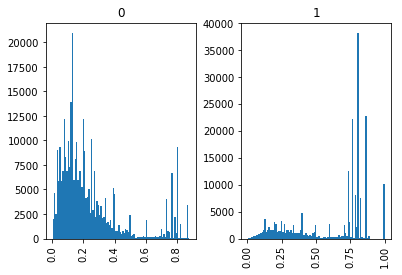

In [10]:
df2[df2.deal_probability > 0]['deal_probability'].hist(by=df2.sold_0, bins=100)

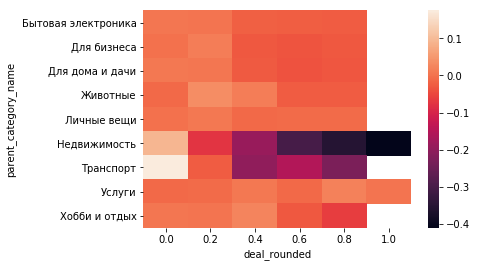

In [11]:
cat_deal = df2[df2['source'] == 'train'].groupby(['parent_category_name','deal_rounded'])['price_normal'].mean().unstack()
sns.heatmap(cat_deal)

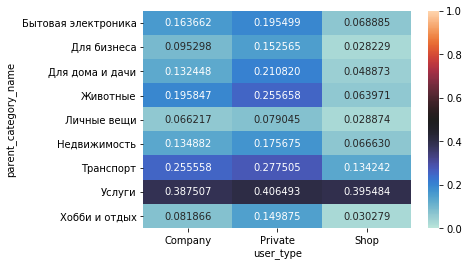

In [12]:
mean_probability = train.groupby(['parent_category_name','user_type'])['deal_probability'].mean().unstack()
sns.heatmap(mean_probability, vmin=0, vmax=1, center=0.5, annot=True, fmt="f")

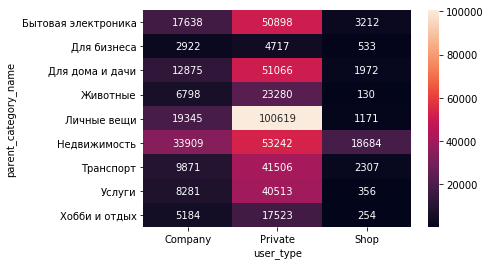

In [13]:
mean_probability2 = train[train['deal_probability'] > 0].groupby(['parent_category_name','user_type'])['deal_probability'].count().unstack()
sns.heatmap(mean_probability2, annot=True, fmt="d")

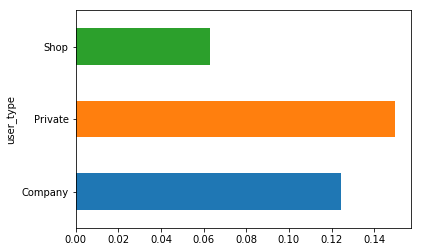

In [14]:
train.groupby('user_type')['deal_probability'].mean().plot(kind='barh')

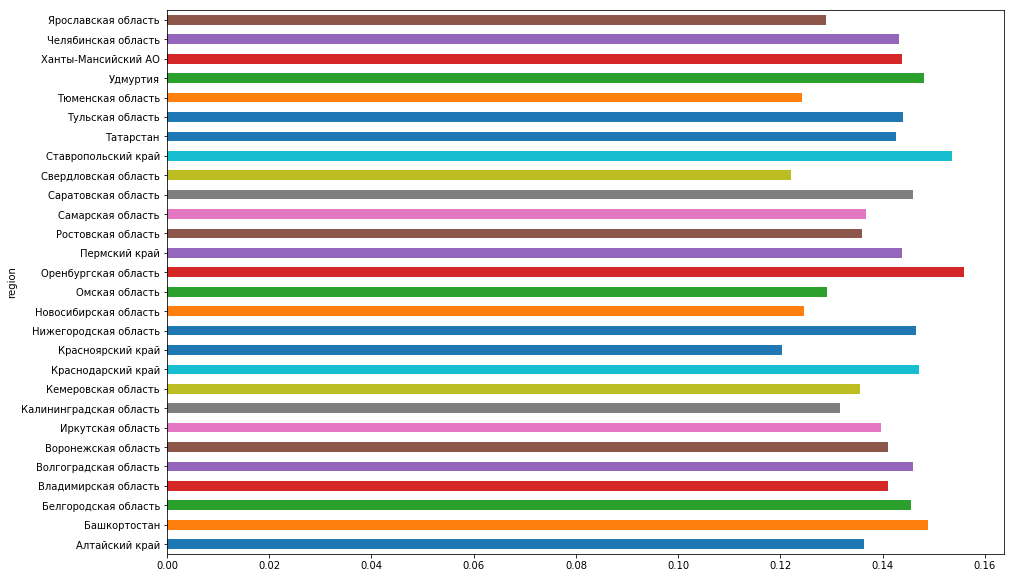

In [15]:
train.groupby('region')['deal_probability'].mean().plot(kind='barh', figsize=(15,10))

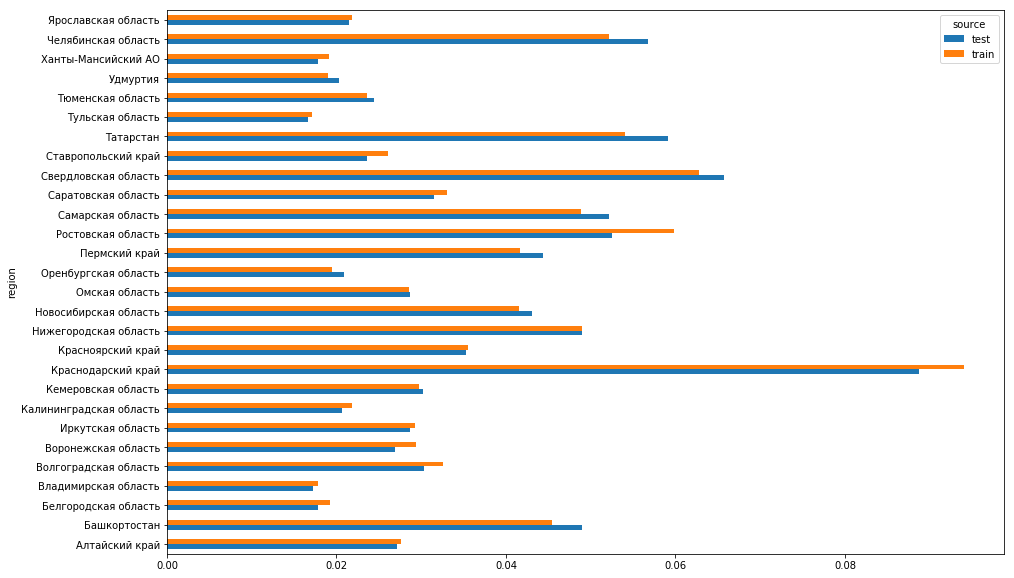

In [16]:
reg = df.groupby(['region','source'])['item_id'].count().unstack()
reg['test'] = reg['test'] / test.shape[0]
reg['train'] = reg['train'] / train.shape[0]
reg.plot(kind='barh',  figsize=(15,10))

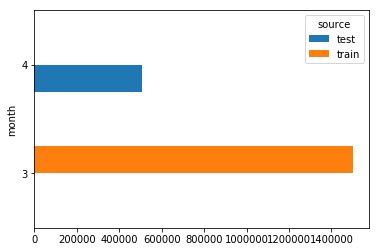

In [17]:
mon = df.groupby(['month','source'])['item_id'].count().unstack().fillna(0)
mon.plot(kind='barh')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002020F32EDD8>,
      dtype=object)

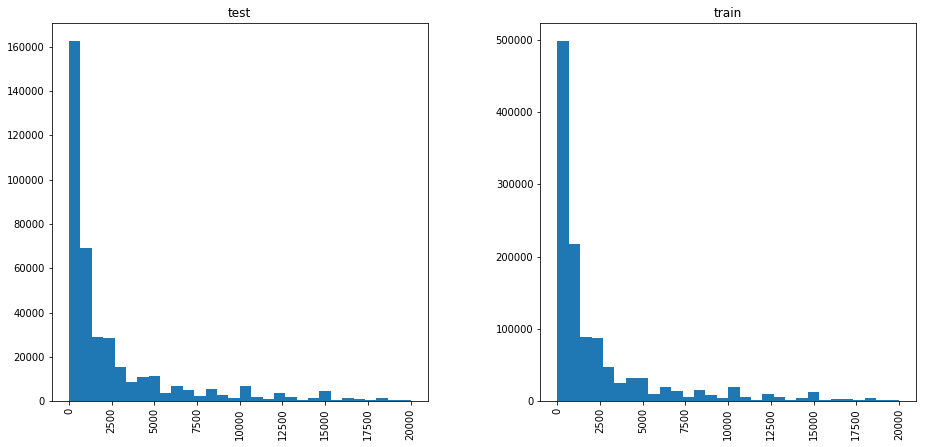

In [18]:
df.price[df.price<20000].hist(by=(df.source), bins=30, figsize=(15,7))

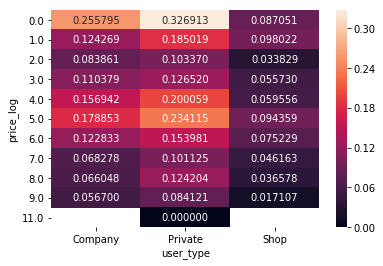

In [26]:
df['price_log'] = np.round(np.log10(df.price + 1),0)
p_log = df.groupby(['price_log', 'user_type'])['deal_probability'].mean()
sns.heatmap(p_log.unstack(), annot=True, fmt="f")

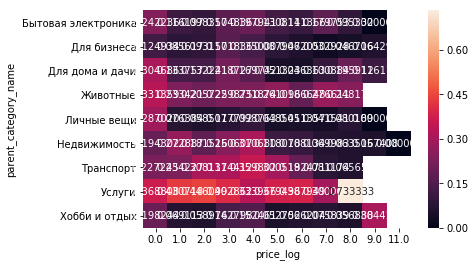

In [28]:
p_cat_log = df.groupby(['parent_category_name','price_log'])['deal_probability'].mean()
sns.heatmap(p_cat_log.unstack(), annot=True, fmt="f")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002022581D0B8>,
      dtype=object)

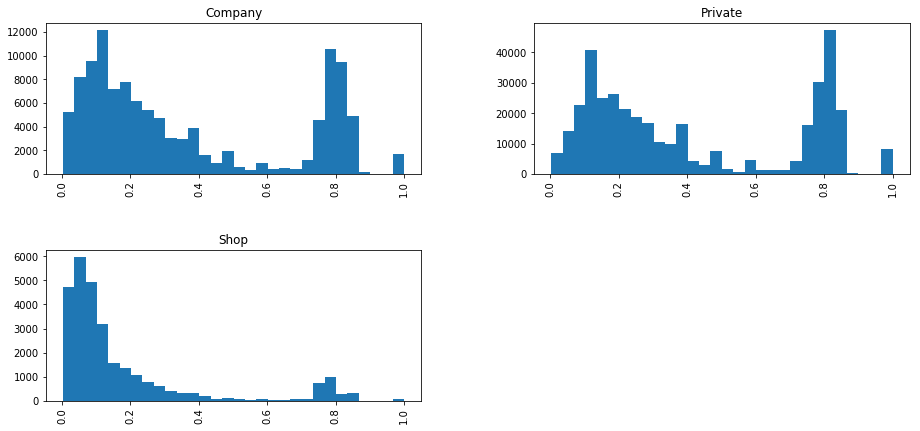

In [30]:
train[train.deal_probability>0].deal_probability.hist(by=(train.user_type),bins=30, figsize=(15,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020225A09A20>,
      dtype=object)

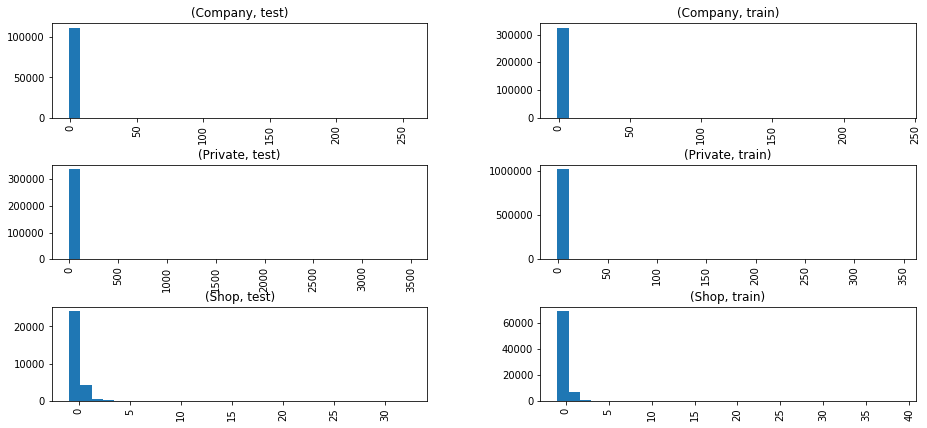

In [31]:
df2.price_normal.hist(by=([df2.user_type, df2.source]),bins=30, figsize=(15,7))

In [2]:
pd.DataFrame(df.groupby(['parent_category_name','category_name'])['param_1','image_top_1'].nunique())

NameError: name 'pd' is not defined

In [32]:
display(train.shape)
display(df2[df2['source'] == 'train'].shape)
display(test.shape)
display(df2[df2['source'] == 'test'].shape)
display(df2.shape)

(1503424, 19)

(1503424, 32)

(508438, 17)

(508438, 32)

(2011862, 32)

In [25]:
df2.to_pickle(dir + 'df2.pickle')